# Answer1
Gradient Boosting Regression is a machine learning technique used for regression problems, where the goal is to predict a continuous numerical value. It is an ensemble learning method that combines the predictions of multiple weak learners (usually decision trees) to create a strong predictive model.

The "gradient" in Gradient Boosting refers to the optimization technique used to minimize the loss function during the training process. The algorithm builds trees sequentially, with each tree attempting to correct the errors of the combined model built so far. The process involves minimizing the residual errors by fitting a new tree to the residual values of the previous predictions.

Here's a brief overview of how Gradient Boosting Regression works:

1. **Initialization:** The initial model is often a simple one, like the mean or median of the target variable.

2. **Iteration (Boosting):** For each iteration, a weak learner (usually a shallow decision tree) is fit to the negative gradient (residuals) of the loss function with respect to the previous model's predictions.

3. **Weighted Combination:** The predictions of each weak learner are then combined, and the process is repeated for a specified number of iterations or until a certain level of performance is achieved.

4. **Regularization:** To prevent overfitting, regularization techniques, such as tree depth limitations or shrinkage, are often applied.

Gradient Boosting Regression has become popular due to its high predictive accuracy and robustness against overfitting. Common implementations include XGBoost, LightGBM, and AdaBoost. These algorithms have various optimizations and enhancements to improve training speed and model performance.

# Answer2

Mean Squared Error: 208.06
R-squared: -1.50


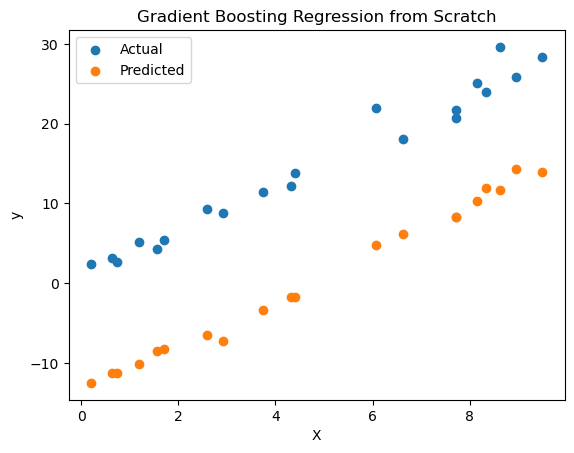

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Generate a synthetic dataset for regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regression from scratch
class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        # Initial prediction is the mean of the target variable
        initial_prediction = np.mean(y)
        predictions = np.full_like(y, initial_prediction)

        for _ in range(self.n_estimators):
            # Calculate the negative gradient (residuals)
            residuals = y - predictions

            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)

            # Make predictions with the new tree
            tree_predictions = tree.predict(X)

            # Update the combined predictions with a fraction (learning_rate) of the new predictions
            predictions += self.learning_rate * tree_predictions

            # Save the trained tree to the list of models
            self.models.append(tree)

    def predict(self, X):
        # Make predictions using all the trained trees
        predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)
        return predictions

# Instantiate and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the original data and the predictions
plt.scatter(X_test, y_test, label='Actual')
plt.scatter(X_test, y_pred, label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Boosting Regression from Scratch')
plt.show()

# Answer3

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin

# Generate a synthetic dataset for regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Updated GradientBoostingRegressor class
class GradientBoostingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []

    def fit(self, X, y):
        # Initial prediction is the mean of the target variable
        initial_prediction = np.mean(y)
        predictions = np.full_like(y, initial_prediction)

        for _ in range(self.n_estimators):
            # Calculate the negative gradient (residuals)
            residuals = y - predictions

            # Fit a decision tree to the residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)

            # Make predictions with the new tree
            tree_predictions = tree.predict(X)

            # Update the combined predictions with a fraction (learning_rate) of the new predictions
            predictions += self.learning_rate * tree_predictions

            # Save the trained tree to the list of models
            self.models.append(tree)

        return self

    def predict(self, X):
        # Make predictions using all the trained trees
        predictions = np.sum(self.learning_rate * model.predict(X) for model in self.models)
        return predictions

    def get_params(self, deep=True):
        return {'n_estimators': self.n_estimators, 'learning_rate': self.learning_rate, 'max_depth': self.max_depth}

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create a GradientBoostingRegressor instance
base_model = GradientBoostingRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(base_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Instantiate the model with the best hyperparameters and fit it to the entire training set
best_gb_model = GradientBoostingRegressor(**best_params)
best_gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_gb_model.predict(X_test)

# Evaluate the model with the best hyperparameters
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Squared Error: {mse_best:.2f}")
print(f"Best Model R-squared: {r2_best:.2f}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Model Mean Squared Error: 206.35
Best Model R-squared: -1.48


# Answer4
In the context of Gradient Boosting, a weak learner is a model that performs slightly better than random chance on a given task. It is often a simple and relatively low-complexity model. The concept of weak learners is crucial to the success of Gradient Boosting, as the algorithm aims to combine multiple weak learners to create a strong predictive model.

The term "weak" does not imply that the individual model is inherently poor but rather that it is not highly expressive or complex. Typically, decision trees with limited depth are used as weak learners in the case of Gradient Boosting for regression or classification tasks.

Here are some characteristics of weak learners in the context of Gradient Boosting:

1. **Low Complexity:** Weak learners are usually simple models with restricted complexity. In the case of decision trees, they might be shallow trees with a limited number of nodes.

2. **Slightly Better than Random:** A weak learner should perform slightly better than random guessing on the task at hand. It should have some ability to capture patterns in the data.

3. **Combinatorial Strength:** While individual weak learners might not be highly accurate, the strength of Gradient Boosting comes from the iterative combination of multiple weak learners. Each new weak learner is trained to correct the errors made by the ensemble of learners constructed so far.

The idea behind using weak learners in Gradient Boosting is that by sequentially adding models to the ensemble, with each model focusing on the mistakes of the previous ones, the algorithm can gradually improve the overall performance and build a highly accurate predictive model.

Commonly used weak learners in Gradient Boosting include shallow decision trees, often referred to as "stumps" when they have very few nodes. These weak learners are computationally efficient and help prevent overfitting during the boosting process.

# Answer5
The intuition behind the Gradient Boosting algorithm can be understood through the following key concepts:

1. **Ensemble Learning:**
   - Gradient Boosting is an ensemble learning technique that combines the predictions of multiple weak learners to create a strong, accurate predictive model.

2. **Sequential Model Building:**
   - The algorithm builds the ensemble sequentially, with each new model aiming to correct the errors of the combined ensemble built so far.

3. **Gradient Descent Optimization:**
   - The term "Gradient" in Gradient Boosting comes from the optimization technique used. It minimizes the loss function by adjusting the predictions of the model in the direction that reduces the error.

4. **Residuals and Pseudo-Residuals:**
   - At each iteration, the algorithm calculates the difference between the actual and predicted values (residuals). The new weak learner is then trained to predict these residuals (pseudo-residuals) rather than the actual target values.

5. **Learning from Mistakes:**
   - The idea is to sequentially add models to the ensemble, with each model focusing on the mistakes made by the combined ensemble constructed so far. This process is akin to learning from the errors of the previous models.

6. **Combining Weak Learners:**
   - Weak learners, often shallow decision trees, are used as base models. While individually weak, when combined, they contribute to a strong predictive model. Each new tree is fitted to the negative gradient of the loss function with respect to the current ensemble's predictions.

7. **Regularization:**
   - To prevent overfitting, regularization techniques such as tree depth limitation and shrinkage (learning rate) are often employed. These techniques help control the complexity of the final model.

8. **Boosting for Weighted Corrections:**
   - The term "Boosting" indicates the iterative nature of the algorithm, where each new weak learner is trained to give more weight to the instances that were misclassified or had higher residuals in the previous iterations.

In summary, the intuition behind Gradient Boosting lies in building a strong predictive model by iteratively improving upon the weaknesses of the existing ensemble. It optimizes the model's predictions in the direction that minimizes the error, leading to a powerful and accurate final model.

# Answer6
The Gradient Boosting algorithm builds an ensemble of weak learners sequentially. The process can be summarized in the following steps:

1. **Initialization:**
   - The process starts with an initial prediction, which is often the mean (or another simple statistic) of the target variable.

2. **Compute Residuals:**
   - Calculate the residuals by subtracting the initial prediction from the actual target values. These residuals represent the errors made by the current ensemble.

3. **Train a Weak Learner:**
   - Fit a weak learner (typically a shallow decision tree) to the residuals. The weak learner is trained to predict the negative gradient of the loss function with respect to the current ensemble's predictions. In other words, it focuses on correcting the errors made by the existing ensemble.

4. **Update Predictions:**
   - Update the ensemble's predictions by adding a fraction (learning rate) of the predictions from the newly trained weak learner. This step is a form of regularization, controlling the contribution of each weak learner to the overall ensemble.

5. **Repeat:**
   - Repeat steps 2-4 for a predefined number of iterations (number of trees or weak learners). In each iteration, a new weak learner is trained to correct the errors of the combined ensemble built so far.

6. **Final Ensemble:**
   - The final prediction is the sum of the predictions from all the weak learners in the ensemble. Each weak learner contributes a weighted amount to the final prediction based on its learning rate.

The iterative nature of Gradient Boosting, where each new weak learner corrects the errors made by the existing ensemble, leads to the creation of a strong predictive model. The process is guided by the optimization of a loss function, which is chosen based on the type of problem (e.g., mean squared error for regression, log loss for classification).

Key points to note:

- The weak learners are typically shallow decision trees, often referred to as "stumps."
- The learning rate controls the contribution of each weak learner, acting as a regularization parameter.
- The process continues until a predefined number of iterations is reached or until a certain level of performance is achieved.

Gradient Boosting is known for its effectiveness and has been widely used in practice, often outperforming other machine learning algorithms in various scenarios. Popular implementations include XGBoost, LightGBM, and scikit-learn's GradientBoostingRegressor/GradientBoostingClassifier.

# Answer7
Constructing the mathematical intuition of the Gradient Boosting algorithm involves understanding the optimization process, the use of weak learners, and the idea of building an additive model to minimize a loss function. Here are the key steps involved in developing the mathematical intuition of Gradient Boosting:

1. **Initialize with a Simple Model:**
   - Start with an initial prediction, often the mean (or another simple statistic) of the target variable. This serves as the baseline prediction.

2. **Compute Residuals:**
   - Calculate the residuals by subtracting the current prediction from the actual target values. The residuals represent the errors made by the current model.

3. **Train a Weak Learner:**
   - Fit a weak learner (usually a decision tree with limited depth) to the residuals. The weak learner aims to capture the patterns or structure in the residuals.

4. **Compute Negative Gradient:**
   - Compute the negative gradient of the loss function with respect to the current predictions. The negative gradient represents the direction in which the predictions should be adjusted to minimize the loss.

5. **Update Predictions:**
   - Update the current predictions by adding a fraction (learning rate) of the predictions from the weak learner. This step is a form of regularization, controlling the contribution of each weak learner to the overall model.

6. **Repeat Steps 2-5:**
   - Repeat the process by computing new residuals, training a new weak learner, and updating predictions. Each iteration focuses on correcting the errors made by the combined ensemble built so far.

7. **Combine Weak Learners:**
   - The final prediction is the sum of the predictions from all the weak learners in the ensemble. Each weak learner contributes to the final prediction based on its learning rate and the direction it provides to minimize the loss.

8. **Optimize Loss Function:**
   - The objective is to minimize a chosen loss function, such as mean squared error for regression or log loss for classification. The algorithm optimizes the model's parameters (tree structure, weights, etc.) in the direction that reduces the loss.

9. **Regularization:**
   - The learning rate and the addition of weak learners act as regularization mechanisms. They prevent overfitting by controlling the influence of each weak learner and ensuring a gradual adjustment of predictions.

10. **Final Ensemble:**
    - The final model is an additive combination of weak learners. The ensemble captures the complex relationships in the data by sequentially refining predictions.

The mathematical intuition involves concepts from optimization, statistics, and machine learning. Understanding how the algorithm minimizes the loss function, uses weak learners, and builds an ensemble helps in gaining a deeper appreciation of Gradient Boosting's power and versatility. Additionally, the regularization mechanisms contribute to the algorithm's ability to generalize well to new data.